In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Gensim
from gensim.corpora.dictionary import Dictionary

In [42]:
# Categories
'''
bank_financial_business_review
construction_review
distribution_trade_transport_reviews
education_review
manufacture_chemistry_review
media_design_reviews
organization_association_reviews
medical_medicine_welfare_reviews
service_reviews
'''

'\nbank_financial_business_review\nconstruction_review\ndistribution_trade_transport_reviews\neducation_review\nmanufacture_chemistry_review\nmedia_design_reviews\norganization_association_reviews\nmedical_medicine_welfare_reviews\nservice_reviews\n'

IMPORT DATA

In [43]:
df = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/service_reviews.csv')
# 결측치 제거
df = df.dropna()
df.head()

,Unnamed: 0,cmp,adv,dadv
0,0,(주)에스씨케이컴퍼니,"휴게시간, 주휴수당 등 법적인 것을 모두 보장받을 수 있다 유동적인 적은 시간 근무...",일하는 시간 동안은 눈코뜰새 없이 일해야함. 핸드폰도 못보고 바쁠때는 화장실도 못감...
1,1,한국맥도날드(유),스케줄을 일주일 단위로 신청 할 수 있어서 일정 조정이 편하다. 지문으로 출퇴근 시...,피크 타임의 인원을 충원해야 하기 때문에 원하지 않는 시간대에 추가 근무 요청이 들...
2,2,롯데리아 (매장),식사를 챙겨준다.신입직원 교육이 길고 배려 잘 해준다. 아르바이트를 체계적으로 배울...,식사가 햄버거뿐이다.최저시급 챙겨준다.휴게시간에 쉴 공간이 없다. 바쁜 시간에는 매...
3,3,(주)트랜스코스모스코리아,도서가 많아서 책읽기 좋고 휴게공간 식사공간이 있어서 중식시간이 편하기 휴식할 수 ...,업무특성상 휴식시간이 제공되지 않아서 화장실만 겨우 다녀온다 휴게시간이 보장되었음 ...
4,4,(주)유베이스,6시 되면 칼퇴근 가능함빨간날은 다 쉼 임시공휴일도 다 쉼 전화 대응 업무라 처음에...,월급이 박봉이고 발전 가능성이 없음기업마다 근무난이도가 다름헬 인 곳은 진짜 힘들어...


In [44]:
# # only for It data
# it1 = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/it_web_communication_reviews_1_100.csv')
# it2 = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/it_web_communication_reviews_101_200.csv')
# it3 = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/it_web_communication_reviews_201_300.csv')
# it4 = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/it_web_communication_reviews_300_end.csv')

# df= pd.concat([it1,it2,it3,it4],axis=0)
# df.index= [i for i in range(563)]
# # 결측치 제거
# df = df.dropna()
# adv = df['adv'] # Advantage review
# dadv = df['dadv'] # Disadvantage review
# df.head()

TOKENIZING

In [45]:
# Word Count
from konlpy.tag import Okt

t = Okt()

def my_tokenizer(doc):
    return [
        token
        for token, pos in t.pos(doc)
        if pos in ['Noun','Verb','Adjective'] and len(token)>1
    ]

In [46]:
text_adv = [my_tokenizer(text) for text in df.adv]
text_dadv = [my_tokenizer(text) for text in df.dadv]

In [47]:
dictionary_adv = Dictionary(text_adv)
dictionary_dadv = Dictionary(text_dadv)
print('#Number of initial unique words in adv_documents:',len(dictionary_adv))
print('#Number of initial unique words in dadv_documents:',len(dictionary_dadv))

dictionary_adv.filter_extremes(keep_n = 2000, no_below = 10, no_above = 0.5)
dictionary_dadv.filter_extremes(keep_n = 2000, no_below = 10, no_above = 0.5)
print("#Number of unique words after removing rae and common words:", len(dictionary_adv))
print("#Number of unique words after removing rae and common words:", len(dictionary_dadv))

corpus_adv = [dictionary_adv.doc2bow(text) for text in text_adv]
corpus_dadv = [dictionary_dadv.doc2bow(text) for text in text_dadv]
print('#Number of unique tokens: %d' % len(dictionary_adv))
print('#Number of documents: %d' % len(corpus_adv))

print('#Number of unique tokens: %d' % len(dictionary_dadv))


#Number of initial unique words in adv_documents: 13191
#Number of initial unique words in dadv_documents: 21562
#Number of unique words after removing rae and common words: 1510
#Number of unique words after removing rae and common words: 2000
#Number of unique tokens: 1510
#Number of documents: 238
#Number of unique tokens: 2000


In [48]:
print('#Number of documents: %d' % len(corpus_dadv))

#Number of documents: 238


LDA MODEL

In [49]:
from gensim.models import LdaModel

num_topics_adv = 7
passes = 5
model_adv = LdaModel(corpus = corpus_adv, id2word = dictionary_adv,passes = passes, num_topics = num_topics_adv,random_state = 7)

In [50]:
num_topics_dadv = 8
model_dadv = LdaModel(corpus = corpus_dadv, id2word = dictionary_dadv,passes = passes, num_topics = num_topics_dadv,random_state = 7)

In [51]:
print('ADV')
print(model_adv.print_topics(num_words=10))
print('\n DADV')
print(model_dadv.print_topics(num_words=10))
# print('#topic distribution of the first document:',model.get_document_topics(corpus)[0])

ADV
[(0, '0.013*"금요일" + 0.008*"할인" + 0.008*"동료" + 0.008*"매월" + 0.007*"간식" + 0.007*"점심" + 0.006*"출근" + 0.006*"기숙사" + 0.005*"사내" + 0.005*"제도"'), (1, '0.007*"파견" + 0.007*"교육" + 0.005*"체계" + 0.005*"음료" + 0.005*"부서" + 0.005*"수당" + 0.005*"강도" + 0.005*"커피" + 0.005*"따라" + 0.005*"입사"'), (2, '0.011*"수당" + 0.008*"매장" + 0.006*"스케줄" + 0.006*"체계" + 0.006*"교육" + 0.005*"지급" + 0.005*"따라" + 0.005*"안정" + 0.005*"대한" + 0.005*"챙겨"'), (3, '0.033*"할인" + 0.015*"대기업" + 0.010*"열사" + 0.010*"혜택" + 0.010*"계열" + 0.008*"호텔" + 0.008*"사업" + 0.007*"수당" + 0.007*"스케줄" + 0.006*"복리"'), (4, '0.014*"대기업" + 0.009*"삼성" + 0.008*"포인트" + 0.008*"부서" + 0.006*"위치" + 0.005*"나쁘지" + 0.005*"수당" + 0.005*"부바" + 0.005*"재택근무" + 0.004*"사업"'), (5, '0.012*"카페" + 0.010*"사내" + 0.009*"구내식당" + 0.009*"지급" + 0.009*"차량" + 0.007*"점심" + 0.007*"건물" + 0.006*"사옥" + 0.006*"없다" + 0.005*"출근"'), (6, '0.009*"점심" + 0.008*"업계" + 0.007*"무료" + 0.007*"저녁" + 0.007*"사내" + 0.007*"커피" + 0.006*"동료" + 0.006*"식사" + 0.006*"젊은" + 0.006*"식당"')]

 DADV
[(0, '0.007*"파견" + 0.006

TOPIC MODELING COMPARISON(based on # topics)

In [52]:
# # topic_modeling csv file
# num_topic_list_adv = [4,7,11]
# num_topic_list_dadv = [4,8,12]

# save_adv = {}
# save_dadv = {}
# for i in num_topic_list_adv:
#     model = LdaModel(corpus = corpus_adv, id2word = dictionary_adv,passes = passes, num_topics = i,random_state = 7)
#     save_adv[i] = model.print_topics(num_words=10)

# for i in num_topic_list_dadv:
#     model = LdaModel(corpus = corpus_dadv, id2word = dictionary_dadv,passes = passes, num_topics = i,random_state = 7)
#     save_dadv[i] = model.print_topics(num_words=10)

# topic_adv_csv = pd.DataFrame.from_dict(save_adv, orient='index')
# topic_adv_csv.to_csv("service_adv_topic_selection.csv")

# topic_dadv_csv = pd.DataFrame.from_dict(save_dadv, orient='index')
# topic_dadv_csv.to_csv("service_dadv_topic_selection.csv")

TOPIC MODELING OUTPUT

In [53]:
output_df_adv = pd.DataFrame({'cmp':df.cmp})
for col in range(num_topics_adv):
    tmp = str(col)
    output_df_adv[tmp] = float(0)
output_df_adv.index = [i for i in range(len(output_df_adv))]


In [54]:
output_df_dadv = pd.DataFrame({'cmp':df.cmp})
for col in range(num_topics_dadv):
    tmp = str(col)
    output_df_dadv[tmp] = float(0)
output_df_dadv.index = [i for i in range(len(output_df_dadv))]


In [55]:
for i, dt in enumerate(model_adv.get_document_topics(corpus_adv)):
    for val in dt:

        idx = str(val[0])
        pt = val[1]

        output_df_adv.at[i,idx] = pt

In [56]:
for i, dt in enumerate(model_dadv.get_document_topics(corpus_dadv)):
    for val in dt:

        idx = str(val[0])
        pt = val[1]

        output_df_dadv.at[i,idx] = pt

In [57]:
# to csv file
output_df_adv.to_csv('service_adv_topic_modeling.csv')
output_df_dadv.to_csv('service_dadv_topic_modeling.csv')

In [58]:
from gensim.models import CoherenceModel

cm_adv = CoherenceModel(model= model_adv, corpus= corpus_adv, coherence= 'u_mass')
cm_dadv = CoherenceModel(model= model_dadv, corpus= corpus_dadv, coherence= 'u_mass')

coherence_adv = cm_adv.get_coherence()
coherence_dadv = cm_dadv.get_coherence()

print(coherence_adv)
print(coherence_dadv)

-0.7848813756923683
-0.721894931283888


num_topics: 3, perplexity: -7.009, coherence: -0.700
num_topics: 4, perplexity: -7.055, coherence: -0.681
num_topics: 5, perplexity: -7.092, coherence: -0.708
num_topics: 6, perplexity: -7.132, coherence: -0.697
num_topics: 7, perplexity: -7.177, coherence: -0.698
num_topics: 8, perplexity: -7.215, coherence: -0.702
num_topics: 9, perplexity: -7.256, coherence: -0.718
num_topics: 10, perplexity: -7.302, coherence: -0.715
num_topics: 11, perplexity: -7.347, coherence: -0.689
num_topics: 12, perplexity: -7.390, coherence: -0.725
num_topics: 13, perplexity: -7.437, coherence: -0.690
num_topics: 14, perplexity: -7.485, coherence: -0.707
num_topics: 15, perplexity: -7.527, coherence: -0.712
num_topics: 16, perplexity: -7.571, coherence: -0.694
num_topics: 17, perplexity: -7.607, coherence: -0.686
num_topics: 18, perplexity: -7.658, coherence: -0.695
num_topics: 19, perplexity: -7.706, coherence: -0.677
num_topics: 20, perplexity: -7.741, coherence: -0.694
num_topics: 21, perplexity: -7.786,

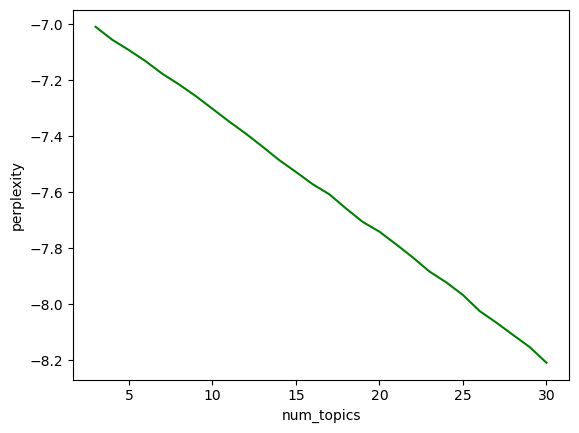

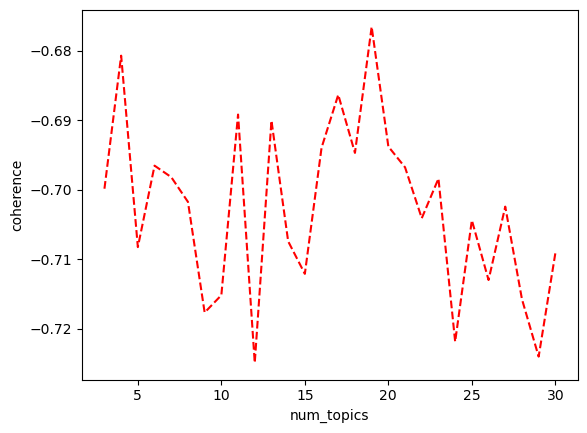

In [59]:
def show_coherence(corpus, dictionary, start = 6, end = 15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end+1):
        model = LdaModel(corpus = corpus, id2word = dictionary, chunksize=1000, num_topics = i,random_state = 7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')
    
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()
# 5, 14
show_coherence(corpus_adv, dictionary_adv, start = 3, end = 30)

num_topics: 3, perplexity: -7.314, coherence: -0.608
num_topics: 4, perplexity: -7.359, coherence: -0.593
num_topics: 5, perplexity: -7.406, coherence: -0.622
num_topics: 6, perplexity: -7.452, coherence: -0.621
num_topics: 7, perplexity: -7.498, coherence: -0.635
num_topics: 8, perplexity: -7.545, coherence: -0.620
num_topics: 9, perplexity: -7.591, coherence: -0.637
num_topics: 10, perplexity: -7.634, coherence: -0.627
num_topics: 11, perplexity: -7.683, coherence: -0.625
num_topics: 12, perplexity: -7.727, coherence: -0.621
num_topics: 13, perplexity: -7.776, coherence: -0.628
num_topics: 14, perplexity: -7.821, coherence: -0.627
num_topics: 15, perplexity: -7.870, coherence: -0.630
num_topics: 16, perplexity: -7.917, coherence: -0.637
num_topics: 17, perplexity: -7.965, coherence: -0.631
num_topics: 18, perplexity: -8.011, coherence: -0.639
num_topics: 19, perplexity: -8.039, coherence: -0.641
num_topics: 20, perplexity: -8.082, coherence: -0.647
num_topics: 21, perplexity: -8.132,

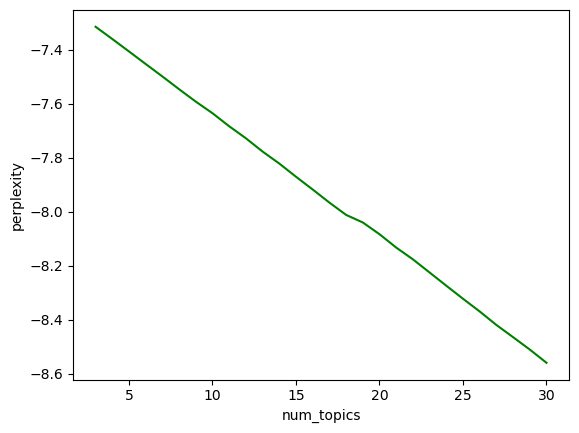

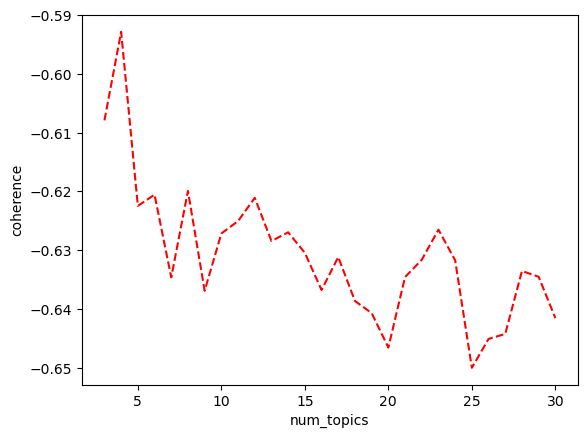

In [60]:
show_coherence(corpus_dadv, dictionary_dadv, start = 3, end = 30)
